In [1]:
# !python -m venv venv

In [ ]:
# %pip install opencv-python matplotlib

In [1]:
import cv2

In [2]:
# Loading an image

image = cv2.imread(
    r"D:\plant_disease_project\Groundnut_Leaf_dataset\train\early_leaf_spot_1\4.jpg"
)
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
image.shape  # displays (height, width, no. of color channels)

(256, 256, 3)

In [3]:
# Grayscale conversion

gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Image", gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
gray_img.shape

(256, 256)

In [21]:
# Resizing

resized_gray_img = cv2.resize(gray_img, (224, 224))
cv2.imshow("Resized Image", resized_gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
resized_gray_img.shape

(224, 224)

In [ ]:
# Get the height and width of the image
height, width = resized_gray_img.shape[:2]
# print("height: ", height)
# print("width: ", width)

# Determine the size of the square (smallest dimension)
# The square size is set to the smaller of the two dimensions (height or width) to ensure the crop fits within the image.
size = min(height, width)
# print("size: ", size)

# Calculate the top-left coordinates of the square crop
x = (width - size) // 2  # gives quotient
y = (height - size) // 2
# print("width starting point: ", x)
# print("height starting point: ", y)

# Perform the cropping
cropped_resized_gray_img = resized_gray_img[
    y : y + size, x : x + size
]  # [from top-y to bottom-y, from left-x to right-y]

# Save or display the cropped image
cv2.imshow(
    "Cropped Resized Gray Image", cropped_resized_gray_img
)  # Display the cropped image
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
# Normalization

print(f"Min pixel value: {np.min(image)}")
print(f"Max pixel value: {np.max(image)}")
print(f"Data type: {image.dtype}")
print(
    f"Values out of range: {(image < 0).sum() + (image > 1).sum()}"
)  # here image is treated as array and then finds no. of values out of [0,1]

# Dividing by 255
normalized = image / 255.0

# Check the min and max pixel values
import numpy as np

print(f"Min pixel value: {np.min(normalized)}")
print(f"Max pixel value: {np.max(normalized)}")
print(f"Data type: {normalized.dtype}")
print(f"Values out of range: {(normalized < 0).sum() + (normalized > 1).sum()}")


# Convert the normalized image to RGB format for visualization
# import matplotlib.pyplot as plt
# normalized_rgb = cv2.cvtColor(normalized, cv2.COLOR_BGR2RGB)
# plt.imshow(normalized_rgb)
# plt.title("Normalized Image")
# plt.axis("off")
# plt.show()

Min pixel value: 14
Max pixel value: 255
Data type: uint8
Values out of range: 196608
Min pixel value: 0.054901960784313725
Max pixel value: 1.0
Data type: float64
Values out of range: 0


The reshape method changes the shape of the array without changing its data.
* -1: The -1 tells NumPy to automatically calculate the number of rows required, based on the total number of elements in the array and the other dimensions.
Essentially, -1 acts as a placeholder for "whatever fits."

* 3: The second dimension is fixed to 3, which represents the RGB channels of the image (or BGR if using OpenCV).

Why Use .reshape(-1, 3)?
This transformation is commonly done to prepare image data for operations like Normalization or Scaling:
* Easy to apply operations like MinMaxScaler from scikit-learn on a 2D array.
* Many ML algorithms expect input in a 2D format where each row represents a sample (in this case, a pixel).


In [40]:
from sklearn.preprocessing import MinMaxScaler

# Convert the image to a 2D array for normalization
# Each pixel becomes a row, and its channel values (RGB) become columns
original_shape = image.shape
image_2d = image.reshape(-1, 3)

# Normalize the pixel values to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_2d = scaler.fit_transform(image_2d)

# Reshape the normalized data back to the original image shape
normalized_image = normalized_2d.reshape(original_shape)

# Display the results
print(f"Original image shape: {image.shape}")
print(f"Normalized image shape: {normalized_image.shape}")

cv2.imshow("Normalized Image", normalized_image)  # Display the Normalized image
cv2.waitKey(0)
cv2.destroyAllWindows()

Original image shape: (256, 256, 3)
Normalized image shape: (256, 256, 3)


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\harin\AppData\Local\Temp\ipykernel_15568\21424625.py:5: SyntaxWarning: invalid escape sequence '\p'
  img = cv2.imread("D:\plant_disease_project\low_contrast_img.jpeg", cv2.IMREAD_GRAYSCALE)


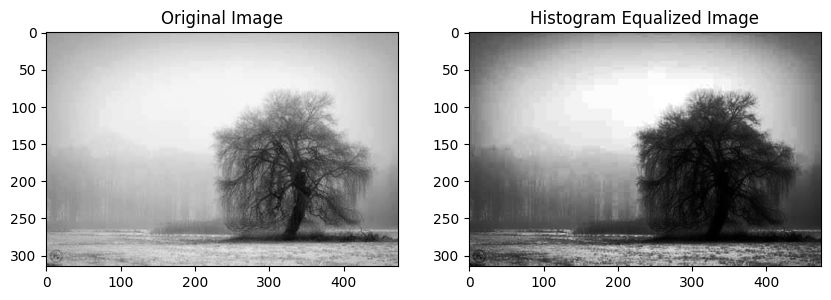

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load a grayscale image
img = cv2.imread("D:\plant_disease_project\low_contrast_img.jpeg", cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
eq_img = cv2.equalizeHist(img)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Histogram Equalized Image")
plt.imshow(eq_img, cmap="gray")
plt.show()

In [11]:
import cv2
import numpy as np

# Load a grayscale image
img = cv2.imread("D:\plant_disease_project\low_contrast_img.jpeg", cv2.IMREAD_GRAYSCALE)

# Compute mean and standard deviation
mean, std = cv2.meanStdDev(img)

# Normalize the image to zero mean and unit variance
std_img = (img - mean) / std

cv2.imshow("Standardized image", std_img)  # Display the cropped image
cv2.waitKey(0)
cv2.destroyAllWindows()

# Verify normalization
new_mean = np.mean(std_img)
new_std = np.std(std_img)

print(f"Mean after normalization: {new_mean}")
print(f"Standard deviation after normalization: {new_std}")

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
C:\Users\harin\AppData\Local\Temp\ipykernel_15568\2086388875.py:5: SyntaxWarning: invalid escape sequence '\p'
  img = cv2.imread("D:\plant_disease_project\low_contrast_img.jpeg", cv2.IMREAD_GRAYSCALE)


Mean after normalization: 6.586237668555212e-17
Standard deviation after normalization: 1.0000000000000002


In [6]:
import cv2
from sklearn.preprocessing import MinMaxScaler

img_path = (
    r"D:\plant_disease_project\Groundnut_Leaf_dataset\train\early_leaf_spot_1\4.jpg"
)
img = cv2.imread(img_path)
if img is not None:
    img = cv2.resize(img, (224, 224))  # Resize

    height, width = img.shape[:2]
    size = min(height, width)
    x = (width - size) // 2  # gives quotient
    y = (height - size) // 2
    img = img[y : y + size, x : x + size]

    original_shape = img.shape
    image_2d = img.reshape(-1, 3)
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized_2d = scaler.fit_transform(image_2d)
    normalized_image = normalized_2d.reshape(original_shape)

In [7]:
cv2.imshow("image", img)  # Display the cropped image
cv2.waitKey(0)
cv2.destroyAllWindows()